In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
wine_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")

In [52]:
wine_df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
wine_df_columns = [ 'class', 'Alcohol', 'Malicity', 'Ash', 'Alcanity', 'Magnesium', 'TotalPhenol', 'Flavanoids', 
                  'NonFlavanoids', 'Prothocyanins', 'ColorIntensity', 'Hue', 'fracdiluted', 'Proline' ]

In [7]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y = wine_df.iloc[:, 1:].values , wine_df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


In [8]:
#Now we want to construct the covariance matrix which is symmetric with d×d-dimension, where d is the dataset dimension. The covariance matrix stores the pairwise covariances between the different features.

covariant_matrix= np.cov(X_train_std.T)

In [48]:
# Display covariant matrix . This is a 13 X 13 square matrix

covariant_matrix

array([[ 1.00819672,  0.11603947,  0.31211059, -0.26884002,  0.24857879,
         0.26293854,  0.23084523, -0.10509644,  0.11067129,  0.56984481,
        -0.02140561,  0.05035879,  0.63027433],
       [ 0.11603947,  1.00819672,  0.19134078,  0.32067514, -0.01297849,
        -0.37759997, -0.44552938,  0.36265151, -0.27511335,  0.30568309,
        -0.59356482, -0.44055186, -0.19602054],
       [ 0.31211059,  0.19134078,  1.00819672,  0.41619457,  0.30183623,
         0.14456248,  0.1257978 ,  0.15754307, -0.04811143,  0.31897527,
        -0.08792976, -0.0091283 ,  0.29288918],
       [-0.26884002,  0.32067514,  0.41619457,  1.00819672, -0.0284448 ,
        -0.26552543, -0.31301539,  0.31452385, -0.24491274,  0.01231029,
        -0.26290392, -0.26423051, -0.4210642 ],
       [ 0.24857879, -0.01297849,  0.30183623, -0.0284448 ,  1.00819672,
         0.18357589,  0.16750482, -0.25463226,  0.17878755,  0.20875925,
         0.04219565,  0.061882  ,  0.37523832],
       [ 0.26293854, -0.377599

In [11]:
#The eigenvectors of the covariance matrix represent the principal components, while the corresponding eigenvalues 
# define their magnitude.

# In the case of the Wine dataset, we obtain 13 eigenvectors and eigenvalues from the 13×13 covariance matrix.

# An eigenvector ν satisfies the following condition where lambda is the eigenvalue: # Aν = λν 
 
# We use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix:


eigen_values , eigen_vectors = np.linalg.eig(covariant_matrix)

In [14]:
eigen_values, eigen_vectors

(array([ 4.80831621,  2.60374779,  1.37087288,  0.89730848,  0.89417853,
         0.61503055,  0.52428622,  0.09986474,  0.36400572,  0.1628064 ,
         0.30351535,  0.23651936,  0.22610515]),
 array([[ 0.11764947, -0.48449198, -0.22676228,  0.22167968, -0.0657581 ,
          0.29682743,  0.07792283, -0.02721779, -0.41894013,  0.27473069,
         -0.34066068, -0.3700865 ,  0.21821592],
        [-0.27125589, -0.22537291,  0.0915252 , -0.05050596,  0.4230611 ,
          0.51436621, -0.55097414, -0.00456689, -0.07912341, -0.1424389 ,
          0.01798525,  0.1616495 , -0.25406603],
        [-0.00287842, -0.37849214,  0.56611151,  0.18058454, -0.21551982,
          0.06167068,  0.10384847,  0.15079088,  0.23426669,  0.00241752,
          0.36953189, -0.40176932, -0.25886059],
        [-0.2187704 , -0.00424088,  0.66946119, -0.01259168,  0.07601025,
         -0.06845273,  0.23091643, -0.11012603, -0.44673576,  0.09095765,
         -0.12428073,  0.35754592,  0.27702039],
        [ 0.11381

In [ ]:
# We computed the covariance matrix of the standardized training dataset using the numpy.cov() function.

# Using the linalg.eig function, we performed the eigendecomposition that yielded 13 eigenvalues and the 
# corresponding eigenvectors stored as columns in a 13×13 matrix.

# Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, 
# we only select the subset of the eigenvectors (principal components) that contains most of the information(variance).

# Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing
# magnitude, and we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues.

# But before we collect those k most informative eigenvectors, let's plot the variance explained ratios of 
# the eigenvalues. The variance explained ratio of an eigenvalue λj is simply the fraction of an eigenvalue
# λj and the total sum of the eigenvalues:
#  λj / ∑j  (tot is ∑j)




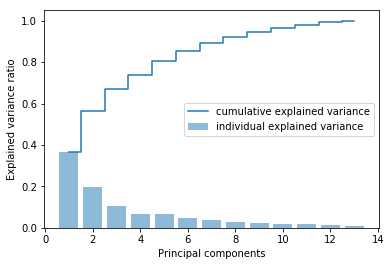

In [21]:
tot = sum(eigen_values)
var_explained = [(i / tot) for i in sorted(eigen_values, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 13 entries as there are 13 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 13 entries with 13 th entry 
# cumulative reaching almost 100%


plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance 
# in the data.

In [23]:
# We're going to sort the eigen-pairs by descending order of the eigenvalues, and construct a projection matrix
# from the selected eigenvectors. Then, using the projection matrix we will transform the data onto the 
#lower-dimensional subspace.

# Let's start by sorting the eigen-pairs by decreasing order of the eigenvalues:

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(4.8083162079634771,
  array([ 0.11764947, -0.27125589, -0.00287842, -0.2187704 ,  0.11381354,
          0.3883771 ,  0.41798859, -0.30781073,  0.31891453, -0.09956432,
          0.31677259,  0.38268756,  0.27026597])),
 (2.6037477936979094,
  array([-0.48449198, -0.22537291, -0.37849214, -0.00424088, -0.29832137,
         -0.08395627, -0.03573104, -0.05530974, -0.03466028, -0.51335364,
          0.21549584,  0.13494201, -0.37608379])),
 (1.3708728776058985,
  array([-0.22676228,  0.0915252 ,  0.56611151,  0.66946119,  0.14770786,
          0.15502807,  0.14704292,  0.07138073,  0.04901835, -0.18399456,
          0.08151526,  0.17418972, -0.16040494])),
 (0.89730848002461316,
  array([ 0.22167968, -0.05050596,  0.18058454, -0.01259168, -0.75074129,
          0.14670929,  0.11253134,  0.4977631 , -0.09028858,  0.05071214,
          0.19286413,  0.08471397,  0.1219576 ])),
 (0.89417852913313467,
  array([-0.0657581 ,  0.4230611 , -0.21551982,  0.07601025, -0.31956416,
          0.220866

In [40]:
# here we are creating from the eigen-pair table, a 2 dim array of only vectors (each column is one vector)
# we are taking only the first two eigen vectors (which cover 60% of variance) for demo purpose

# Note that choosing the number of principal components has to be determined from a trade-off between computational 
# efficiency and the performance of the classifier, however, we only chose two eigenvectors for the demonstration 
# purpose.

# We use hstack (horizontally stack 0th row 1st column, 1st row 1st column). The newaxis() function of np
# coverts a row vector to a column vector and stacks those vectors horizontally
#Now we've created a 13 × 2 projection matrix W from the top two eigenvectors.





w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [41]:
w

array([[ 0.11764947, -0.48449198],
       [-0.27125589, -0.22537291],
       [-0.00287842, -0.37849214],
       [-0.2187704 , -0.00424088],
       [ 0.11381354, -0.29832137],
       [ 0.3883771 , -0.08395627],
       [ 0.41798859, -0.03573104],
       [-0.30781073, -0.05530974],
       [ 0.31891453, -0.03466028],
       [-0.09956432, -0.51335364],
       [ 0.31677259,  0.21549584],
       [ 0.38268756,  0.13494201],
       [ 0.27026597, -0.37608379]])

In [26]:
X_train_std[0]

array([-0.16184363, -0.62896274,  0.5741578 , -0.49712977, -0.29104738,
        0.29593887,  0.34966073, -0.81679543, -0.2483745 , -0.46074326,
        0.59319035,  1.46755686,  0.85830972])

In [27]:
# we want to transform the Wine dataset (X_traini_std) onto the new principal component axes
# Transform dataset onto a new principal axes using matrix multiplication (shown as dot operation)

X_train_std[0].dot(w)

array([ 1.68621444,  0.3478216 ])

In [28]:
# complete matrix operation 

X_train_pca = X_train_std.dot(w)
X_train_std.shape, w.shape, X_train_pca.shape

((123, 13), (13, 2), (123, 2))

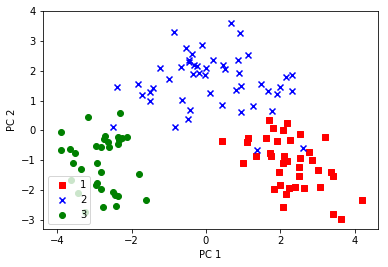

In [33]:
# For the scatter plot, we take data points from X_train_pca PC1 and PC2 for all those cases where y_train lable is L 
# where L  can vary from 1,2,3.
# For each L, a corresponding color and marker is used in the plot

colors = ['r' , 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train ==l , 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()